<a href="https://colab.research.google.com/github/DioSurreal/Crime-Data-Analysis/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## impoerting and set up project

In [55]:
!pip install folium

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



import folium
from IPython.display import display, IFrame
import requests
from io import BytesIO
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore")

In [57]:
!kaggle datasets download -d candacegostinski/crime-data-analysis

Dataset URL: https://www.kaggle.com/datasets/candacegostinski/crime-data-analysis
License(s): CC0-1.0
crime-data-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
!unzip crime-data-analysis.zip

Archive:  crime-data-analysis.zip
replace Crime_Data_from_2020_to_Present.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [59]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [60]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           955339 non-null  int64  
 1   date_rptd       955339 non-null  object 
 2   date_occ        955339 non-null  object 
 3   time_occ        955339 non-null  int64  
 4   area            955339 non-null  int64  
 5   area_name       955339 non-null  object 
 6   rpt_dist_no     955339 non-null  int64  
 7   part_1-2        955339 non-null  int64  
 8   crm_cd          955339 non-null  int64  
 9   crm_cd_desc     955339 non-null  object 
 10  mocodes         818664 non-null  object 
 11  vict_age        955339 non-null  int64  
 12  vict_sex        825294 non-null  object 
 13  vict_descent    825284 non-null  object 
 14  premis_cd       955327 non-null  float64
 15  premis_desc     954770 non-null  object 
 16  weapon_used_cd  325019 non-null  float64
 17  weapon_des

## Data Cleaning

In [61]:
df_col = df.columns

for name in df_col:
    print(f"Column: {name}")
    print(df[name].value_counts())  # เพิ่ม print เพื่อแสดงผลลัพธ์การนับค่า
    print('-' * 50)


Column: dr_no
dr_no
190326475    1
220106316    1
221309331    1
222018430    1
222111372    1
            ..
211608495    1
210316164    1
210305329    1
210410863    1
240309674    1
Name: count, Length: 955339, dtype: int64
--------------------------------------------------
Column: date_rptd
date_rptd
02/03/2023 12:00:00 AM    925
02/02/2023 12:00:00 AM    921
01/03/2023 12:00:00 AM    913
05/02/2022 12:00:00 AM    909
04/04/2022 12:00:00 AM    883
                         ... 
06/16/2024 12:00:00 AM    209
05/26/2024 12:00:00 AM    199
06/21/2024 12:00:00 AM    193
06/23/2024 12:00:00 AM    189
06/24/2024 12:00:00 AM    138
Name: count, Length: 1637, dtype: int64
--------------------------------------------------
Column: date_occ
date_occ
01/01/2020 12:00:00 AM    1148
01/01/2023 12:00:00 AM    1136
12/02/2022 12:00:00 AM    1132
02/01/2023 12:00:00 AM    1090
10/01/2022 12:00:00 AM    1077
                          ... 
06/22/2024 12:00:00 AM     177
06/19/2024 12:00:00 AM     175

In [62]:
df_cleaned = df.copy()

### null

In [63]:
df_cleaned.isnull().sum()

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


โอเคผมจะเริ่มจัดการข้อมูลแล้วจากนี้เพื่อแก้ปัญหา missing value,outlier

In [64]:
#แก้ปัญหาoutlierของ feature vict_age ด้วยการดูว่าแต่ละ qualtile มีค้าเท่าไหร่
df_cleaned['vict_age'].quantile([0,0.25,0.5,0.75,0.90,0.95,0.999,1])

,vict_age
0.000,-4.0
0.250,0.0
0.500,30.0
0.750,45.0
0.900,59.0
0.950,66.0
0.999,92.0
1.000,120.0


ต่อไปฉันจะทำจัดการกับ outlier ของ feature vict_age

In [65]:
df_cleaned = df_cleaned[df_cleaned['vict_age'].between(1,92)]
df_cleaned.shape

(708699, 28)

In [66]:
df_cleaned.isnull().sum()

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


In [67]:
# สร้าง DataFrame ที่นับจำนวน mocodes โดยกลุ่ม crm_cd_desc
df_count = df_cleaned.groupby('crm_cd_desc')['mocodes'].value_counts().sort_values(ascending=False).reset_index(name='count')

# แสดงผลลัพธ์
df_count.iloc[:10]

,crm_cd_desc,mocodes,count
0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,9861
1,THEFT PLAIN - PETTY ($950 & UNDER),0344,9134
2,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,5980
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,4731
4,BURGLARY FROM VEHICLE,0344,4292
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1300,3995
6,THEFT OF IDENTITY,0100,3989
7,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,3701
8,THEFT OF IDENTITY,1822,3371
9,THEFT OF IDENTITY,0377,3237


columns mocodes ด้วยความที่ไม่อยากเสียdata เปล่าๆ ฉันก็เลยพยายามมองหาความเชื่อมโยงของโค้ดต่างๆคอลัมน์อื่นเพื่อจะพอนำมาใช้งานได้บ้างซึ่งฉันก็พบว่ามันมีความสัมพันธ์กับคอลัมน์ crm_cd_desc ว่าแต่ละโค้ดจะมีความเชื่อมโยงกับเคสต่างๆ เลยพยายามที่จะเติมค่านั้นตามเคสต่างๆ ด้วยค่าฐานนิยมของแต่ละ crm_cd_desc



In [68]:
# นับจำนวนค่าที่ซ้ำในคอลัมน์ 'Crm Cd Desc'
crm_cd_desc_counts = df_cleaned['crm_cd_desc'].value_counts()

# แปลงค่าที่นับได้เป็น array ที่ประกอบด้วยชื่อประเภท
crm_cd_desc_values = [(index) for index in crm_cd_desc_counts.index]

# วนลูปในแต่ละประเภท
for col_name in crm_cd_desc_values:
    # หา mode ของ mocodes สำหรับแต่ละประเภท 'crm_cd_desc'
    mocode_mode = df_cleaned.loc[df_cleaned['crm_cd_desc'] == col_name, 'mocodes'].mode()

    # ตรวจสอบว่ามี mode หรือไม่
    if not mocode_mode.empty:
        # ถ้ามีค่า mode ให้แทนที่ mocodes ที่เป็น null ด้วยค่า mode
        df_cleaned.loc[
            (df_cleaned['crm_cd_desc'] == col_name) & (df['mocodes'].isnull()),
            'mocodes'
        ] = mocode_mode[0]

In [69]:
df_cleaned['mocodes'].isnull().sum()

0

ต่อไปจะเป็นการจัดการค่า null ใน vict_descent ซึ่งฉันคิดว่าจะเติมค่า null จากการหาความเชื่อมโยงจากพื้นที่ที่เกิดเหตุ โดยการใช้ feature Lat และ Lon เพื่อทำการเติมค่าให้สมบูรณ์โดยการทำ kmeans classification

In [70]:
df_cleaned[['lat','lon']].describe()

,lat,lon
count,708699.000000,708699.000000
mean,33.993676,-118.072251
std,1.673500,5.800984
min,0.000000,-118.667600
25%,34.014900,-118.433700
50%,34.059100,-118.325700
75%,34.166600,-118.275900
max,34.334300,0.000000


เหมือนว่าผมจำเป็นจะต้องจัดการrowที่เป็น 0 เพื่อไม่ทำให้เกิดปัญหาจาก outlierก่อนเข้าโมเดลซะแล้ว

In [71]:
df_cleaned = df_cleaned[(df_cleaned['lat'] != 0) & (df_cleaned['lon'] != 0)]
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned[(df_cleaned['lat'] == 0) | (df_cleaned['lon'] == 0)].sum()

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


In [72]:
df_cleaned['vict_descent'].replace('-', np.nan, inplace=True)

In [73]:
df_cleaned['vict_descent'].isnull().sum()

32

In [74]:
df_cleaned['vict_descent'].value_counts()

,count
vict_descent,
H,282515
W,177641
B,130448
O,62357
A,20355
X,15648
K,5311
F,4218
C,3950


In [75]:
df_cleaned['vict_sex'].isnull().sum()

31

In [76]:
df_cleaned['vict_sex'].value_counts()

,count
vict_sex,
M,355997
F,341599
X,9259
H,107


In [77]:
df_cleaned['vict_sex'].replace('-', np.nan, inplace=True)

โอเค จากที่ผมลองสังเกตุfeatureต่างๆที่มีค่า null อยู่ ฉันคิดว่าแต่ละfeatureสามารถที่จะแทนค่าได้เลย
weapon_used_cd,weapon_desc,vict_sex,vict_descent, crm_cd_1,crm_cd_2, crm_cd_3, crm_cd_4, cross_street ฉันจะแทนค่าใน feature เหล่านี้ ให้กลายเป็น 0หรือ UNK ไปเพราะการที่มีค่าว่างนั่นอาจจะหมายถึงการยืนยันตัวตนของข้อมูลนั้นคือการที่ไม่มีอยู่ก็ได้
ส่วน premis_desc,vict_sex,vict_descent,premis_cd ผมจะเติมค่านี้ด้วยค่าฐานนิยมของfeatureตัวมันเอง ส่วน status ผมจะเติมค่าว่างด้วย 'UNK'

In [78]:
df_cleaned['vict_sex'].fillna(df_cleaned['vict_sex'].mode()[0], inplace=True)
df_cleaned['vict_descent'].fillna(df_cleaned['vict_descent'].mode()[0], inplace=True)

In [79]:
df_cleaned['status'].fillna('UNK',inplace=True)

df_cleaned['status'].isnull().sum()

0

In [80]:
df_cleaned['premis_cd'].fillna(df_cleaned['premis_cd'].mode()[0], inplace=True)
df_cleaned['premis_desc'].fillna(df_cleaned['premis_desc'].mode()[0], inplace=True)

df_cleaned['weapon_used_cd'].fillna(0, inplace=True)
df_cleaned['weapon_desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON', inplace=True)

df_cleaned['crm_cd_1'].fillna(df_cleaned['crm_cd_1'].mode()[0], inplace=True)

df_cleaned['crm_cd_2'].fillna(0, inplace=True)
df_cleaned['crm_cd_3'].fillna(0, inplace=True)
df_cleaned['crm_cd_4'].fillna(0, inplace=True)

df_cleaned['cross_street'].fillna('NO', inplace=True)

df_cleaned.isnull().sum()

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


In [81]:
df_cleaned['date_rptd'] = pd.to_datetime(df_cleaned['date_rptd'], format='%m/%d/%Y %I:%M:%S %p') # Added time and AM/PM information to the format string
df_cleaned['date_occ'] = pd.to_datetime(df_cleaned['date_occ'], format='%m/%d/%Y %I:%M:%S %p')
df_cleaned['time_occ'] = df_cleaned['time_occ'].apply(lambda x: str(x).zfill(4))

df_cleaned['time_occ'] = df_cleaned['time_occ'].str[:2] + ':' + df_cleaned['time_occ'].str[2:]

df_cleaned['time_occ'] = pd.to_datetime(df_cleaned['time_occ'], format='%H:%M').dt.time

df_cleaned

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,200106753,2020-02-09,2020-02-08,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,0.0,0.0,1000 S FLOWER ST,NO,34.0444,-118.2628
1,200320258,2020-11-11,2020-11-04,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,0.0,0.0,0.0,1400 W 37TH ST,NO,34.0210,-118.3002
2,200907217,2023-05-10,2020-03-10,20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,NO,34.1576,-118.4387
3,220614831,2022-08-18,2020-08-17,12:00:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,0.0,0.0,0.0,1900 TRANSIENT,NO,34.0944,-118.3277
4,231808869,2023-04-04,2020-12-01,23:00:00,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,0.0,0.0,0.0,9900 COMPTON AV,NO,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706988,241605270,2024-02-11,2024-02-11,19:20:00,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,0.0,0.0,0.0,8700 SHARP AV,NO,34.2278,-118.4051
706989,241604405,2024-01-14,2024-01-13,07:20:00,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,0.0,0.0,0.0,8700 LANKERSHIM BL,NO,34.2271,-118.3878
706990,242106032,2024-02-20,2024-02-17,23:30:00,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,0.0,0.0,0.0,22700 NAPA ST,NO,34.2260,-118.6214
706991,242004546,2024-01-16,2024-01-16,15:10:00,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,0.0,0.0,0.0,HOBART BL,3RD ST,34.0690,-118.3054


In [82]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706993 entries, 0 to 706992
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dr_no           706993 non-null  int64         
 1   date_rptd       706993 non-null  datetime64[ns]
 2   date_occ        706993 non-null  datetime64[ns]
 3   time_occ        706993 non-null  object        
 4   area            706993 non-null  int64         
 5   area_name       706993 non-null  object        
 6   rpt_dist_no     706993 non-null  int64         
 7   part_1-2        706993 non-null  int64         
 8   crm_cd          706993 non-null  int64         
 9   crm_cd_desc     706993 non-null  object        
 10  mocodes         706993 non-null  object        
 11  vict_age        706993 non-null  int64         
 12  vict_sex        706993 non-null  object        
 13  vict_descent    706993 non-null  object        
 14  premis_cd       706993 non-null  flo

In [83]:
df_cleaned.to_csv('cleaned_crime_data.csv', index=False)

In [84]:
df_cleaned.drop(['dr_no'], axis=1, inplace=True)

descriptive analysis

In [85]:
df_cleaned.describe()

,date_rptd,date_occ,area,rpt_dist_no,part_1-2,crm_cd,vict_age,premis_cd,weapon_used_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,lat,lon
count,706993,706993,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000,706993.000000
mean,2022-03-30 23:40:36.826955520,2022-03-17 21:14:38.199925248,10.716481,1118.060259,1.481720,498.590830,39.482689,335.032295,154.074728,498.277385,72.139864,2.982013,0.085494,34.075704,-118.357164
min,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,1.000000,110.000000,2.000000,101.000000,0.000000,110.000000,0.000000,0.000000,0.000000,33.705900,-118.667600
25%,2021-03-23 00:00:00,2021-03-06 00:00:00,5.000000,589.000000,1.000000,330.000000,28.000000,104.000000,0.000000,330.000000,0.000000,0.000000,0.000000,34.015500,-118.433900
50%,2022-04-20 00:00:00,2022-04-04 00:00:00,11.000000,1136.000000,1.000000,440.000000,37.000000,404.000000,0.000000,440.000000,0.000000,0.000000,0.000000,34.059400,-118.326300
75%,2023-04-14 00:00:00,2023-03-31 00:00:00,16.000000,1636.000000,2.000000,626.000000,50.000000,502.000000,400.000000,626.000000,0.000000,0.000000,0.000000,34.166700,-118.276100
max,2024-06-24 00:00:00,2024-06-24 00:00:00,21.000000,2199.000000,2.000000,956.000000,92.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,-118.155400
std,NaN,NaN,6.162568,616.040336,0.499666,221.616159,15.487941,216.802494,196.819441,221.371345,253.875918,54.167003,9.207232,0.110432,0.105429


###1. How did the rate of crime change between 2020 and 2023?

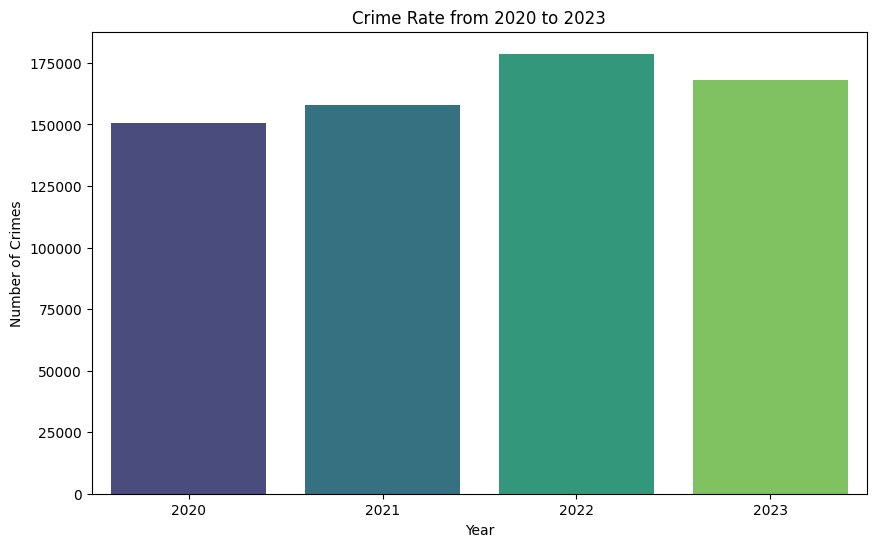

In [86]:
# Filter data to include only records from 2020 to 2024
df_cleaned_filtered = df_cleaned[(df_cleaned['date_occ'].dt.year >= 2020) & (df_cleaned['date_occ'].dt.year <= 2023)]

# Create a new column 'year' from 'date_occ'
df_cleaned_filtered['year'] = df_cleaned_filtered['date_occ'].dt.year


plt.figure(figsize=(10, 6))
sns.countplot(x=df_cleaned_filtered['year'], data = df_cleaned_filtered, palette='viridis')
plt.title('Crime Rate from 2020 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


Actually, the data is available until 2024, but it's less than 1 year old, so I won't analyze it yet.

From 2020 to 2023, crime rates overall increased by about 16.5%, indicating a notable rise in crime during this period, peaking in 2022 and slightly declining in 2023.

The crime rate saw a steady increase between 2020 and 2022, with a peak in 2022. However, in 2023, the crime rate slightly decreased, indicating a possible stabilization or reduction in criminal activities after the peak in 2022.

###2. What are the most common crimes?




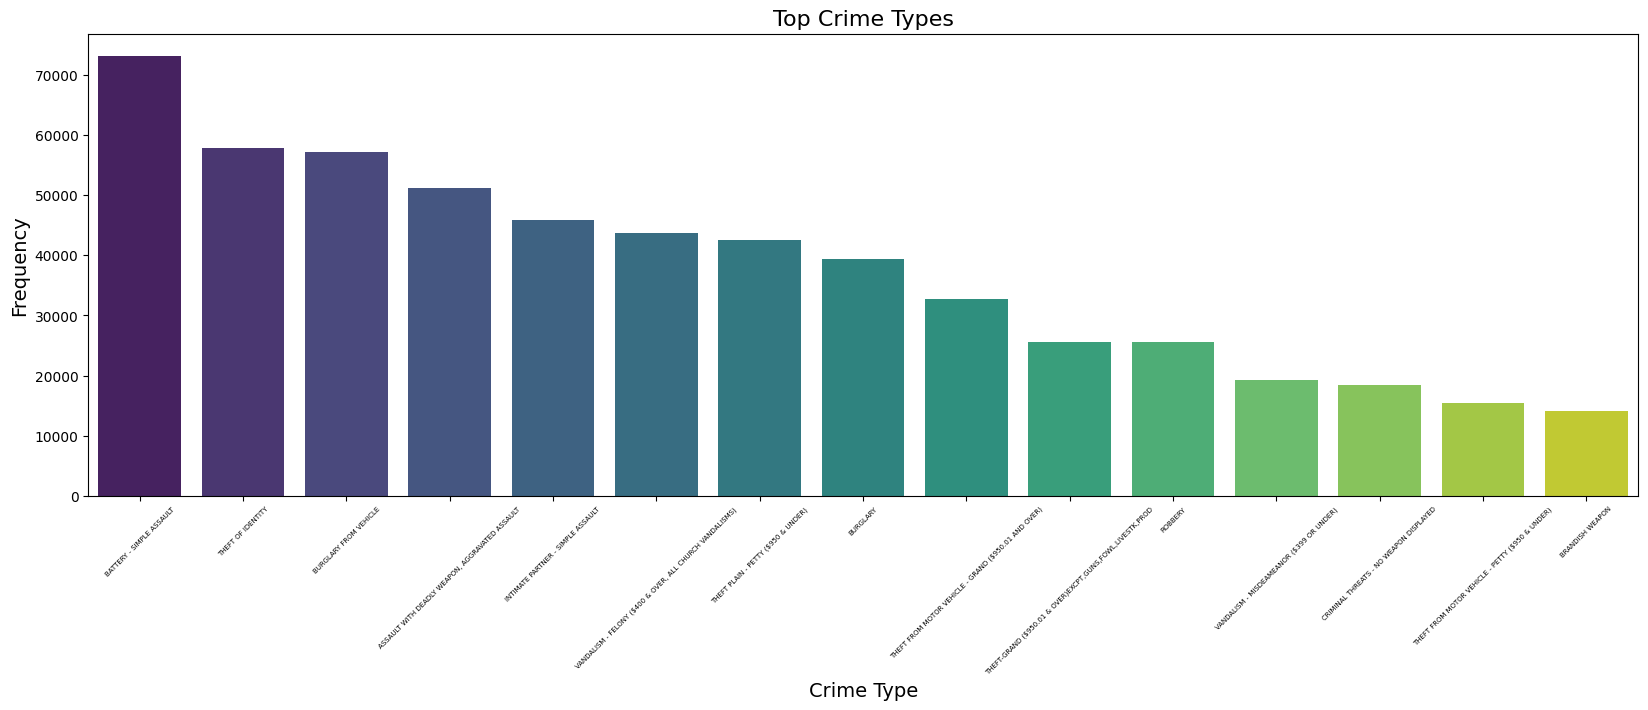

In [87]:
top_crimes = df_cleaned['crm_cd_desc'].value_counts().head(15)
top_crimes_df = top_crimes.to_frame()


# The index is used instead of the non-existent column 'crm_cd_desc'
plt.figure(figsize=(20, 6))

# Pass x and y as named arguments.
sns.barplot(x=top_crimes_df.index, y=top_crimes_df['count'],palette='viridis') # Use the correct column name 'count'
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top Crime Types', fontsize=16)

plt.xticks(rotation=45, fontsize=5)

plt.show()

As you can see,Battery - Sample Assault ranks first with a very high number of cases, followed by Theft of Identity.

### 3.What descent are most of the victims?

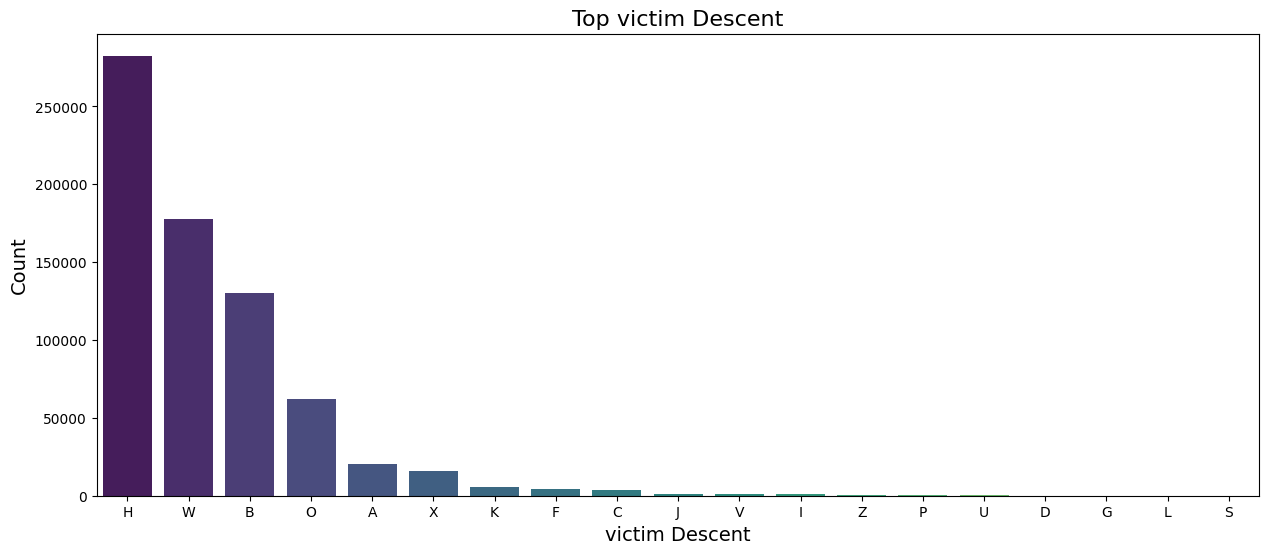

In [88]:
top_vict_descent = df_cleaned['vict_descent'].value_counts()
top_vict_descent_df = top_vict_descent.to_frame()


# The index is used instead of the non-existent column 'vict_descent'
plt.figure(figsize=(15, 6))

# Pass x and y as named arguments.
sns.barplot(x=top_vict_descent_df.index, y=top_vict_descent_df['count'],palette='viridis') # Use the correct column name 'count'
plt.xlabel('victim Descent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top victim Descent', fontsize=16)

plt.xticks(rotation=0, fontsize=10)

plt.show()

From the graph, you can see that the H (Hispanic) ethnicity is significantly more represented. We may need to examine the area where these incidents occur by looking at the Latitude and Longitude data.

In [89]:
map_data = df_cleaned.groupby('area')[['lat', 'lon']].mean().reset_index()

In [90]:
m = folium.Map(location=[map_data['lat'].mean(), map_data['lon'].median()], zoom_start=11)

for index, row in map_data.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['area']).add_to(m)

m

Alright, based on the data we have, by plotting the latitude and longitude, we found that most of the crime cases occur on the west side of America, where the Hispanic population is significantly high. Therefore, it may not be surprising that most of the crime data involves Hispanic individuals.

###4.What are the most common ages of the victims ranked in order?

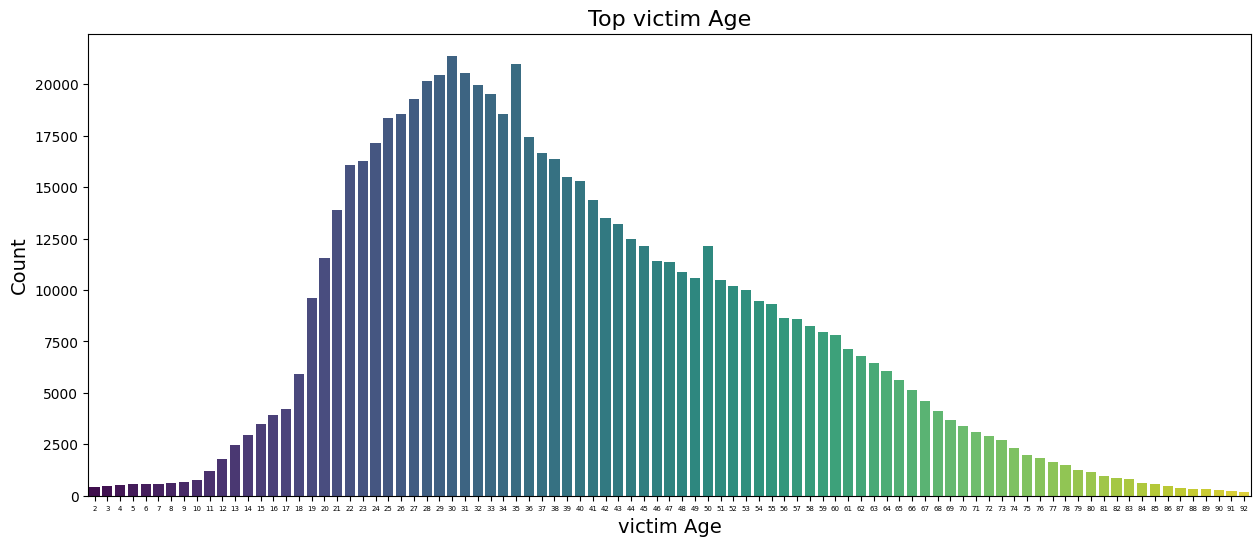

In [91]:
top_vict_age = df_cleaned['vict_age'].value_counts()
top_vict_age_df = top_vict_age.to_frame()


# The index is used instead of the non-existent column 'vict_age'
plt.figure(figsize=(15, 6))

# Pass x and y as named arguments.
sns.barplot(x=top_vict_age_df.index, y=top_vict_age_df['count'],palette='viridis') # Use the correct column name 'count'
plt.xlabel('victim Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top victim Age', fontsize=16)

plt.xticks(rotation=0, fontsize=5)

plt.show()

Based on the graph, it is found that individuals aged **19-54** are the most common victims of crime, with the highest number of victims at age **30**, followed by age **35**.

###5.What time has the most crime?

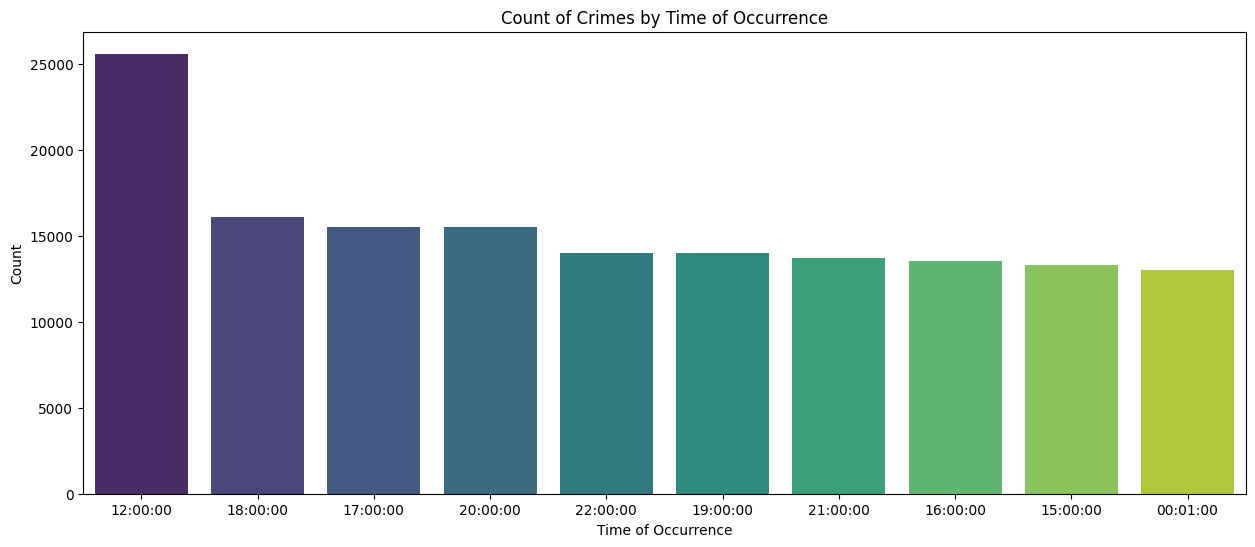

In [92]:
df_time_occ = df_cleaned[['time_occ']].value_counts().reset_index(name='count')
df_time_occ = df_time_occ.iloc[:10]

plt.figure(figsize=(15, 6))
sns.barplot(x='time_occ', y='count', data=df_time_occ, palette='viridis')
plt.xlabel('Time of Occurrence')
plt.ylabel('Count')

plt.title('Count of Crimes by Time of Occurrence')
plt.show()

From what you observe, the time when crime occurs the most is **12:00** PM, which is significantly high. Additionally, crimes often happen between **5:00** PM - **10:00** PM. This analysis could be helpful in adjusting security measures more effectively.

Next, I will separate the data by day and month to analyze the frequency of crime occurrences.

In [93]:
df_cleaned['day_of_week_occ'] = df_cleaned['date_occ'].dt.day_name()
df_cleaned['month_occ'] = df_cleaned['date_occ'].dt.month

Next, we will identify which day of the week tends to have the highest number of crimes.

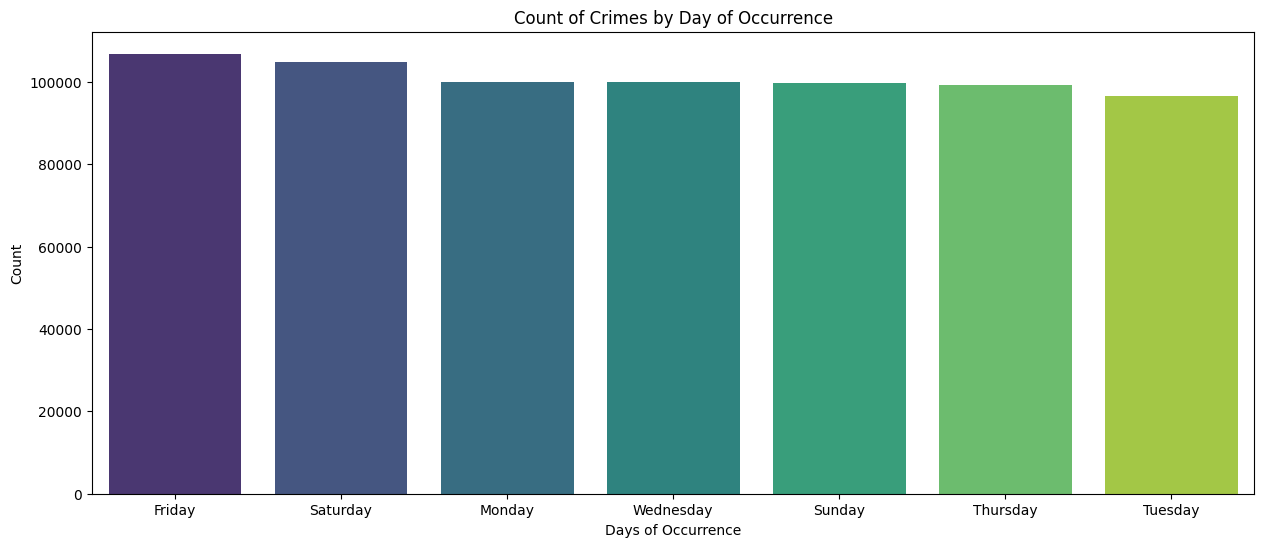

In [94]:
df_day_occ = df_cleaned[['day_of_week_occ']].value_counts().reset_index(name='count')
df_day_occ = df_day_occ.iloc[:10]

plt.figure(figsize=(15, 6))
sns.barplot(x='day_of_week_occ', y='count', data=df_day_occ, palette='viridis')
plt.xlabel('Days of Occurrence')
plt.ylabel('Count')

plt.title('Count of Crimes by Day of Occurrence')
plt.show()

From the analysis, it was found that crime occurrences don't significantly vary across the days of the week. However, **Friday** has the highest number of crimes.

Next, I will determine which month has the highest number of crimes.


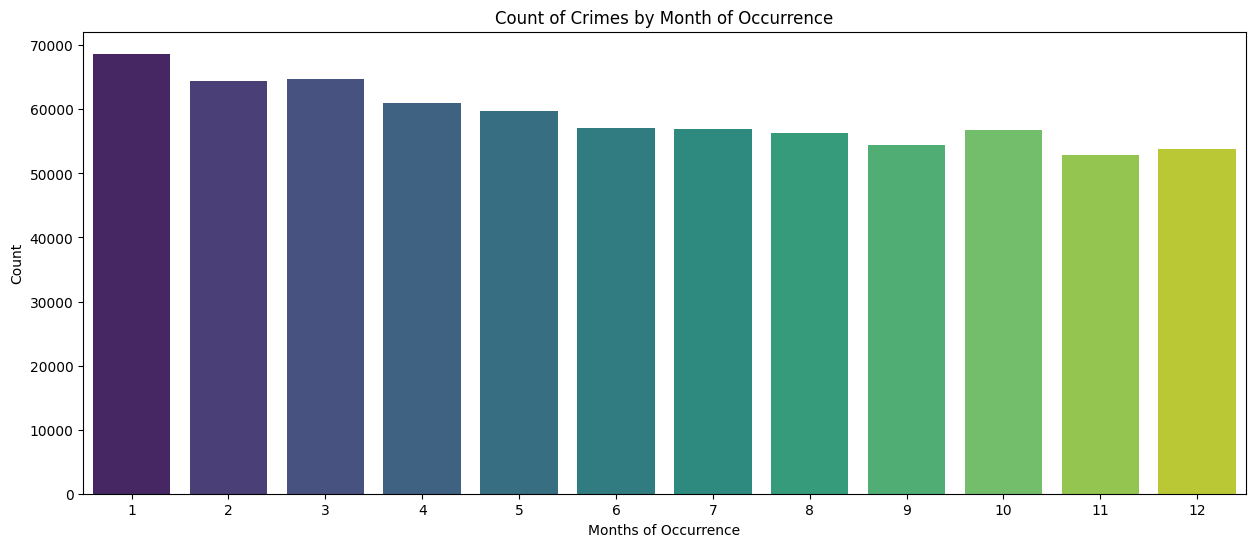

In [95]:
df_month_occ = df_cleaned[['month_occ']].value_counts().reset_index(name='count')
df_month_occ = df_month_occ.iloc[:12]

plt.figure(figsize=(15, 6))
sns.barplot(x='month_occ', y='count', data=df_month_occ, palette='viridis')
plt.xlabel('Months of Occurrence')
plt.ylabel('Count')

plt.title('Count of Crimes by Month of Occurrence')
plt.show()

Although there isn't a significant difference, the pattern of the results is organized by the months of the year in order.

###6.Which area has the most crime?

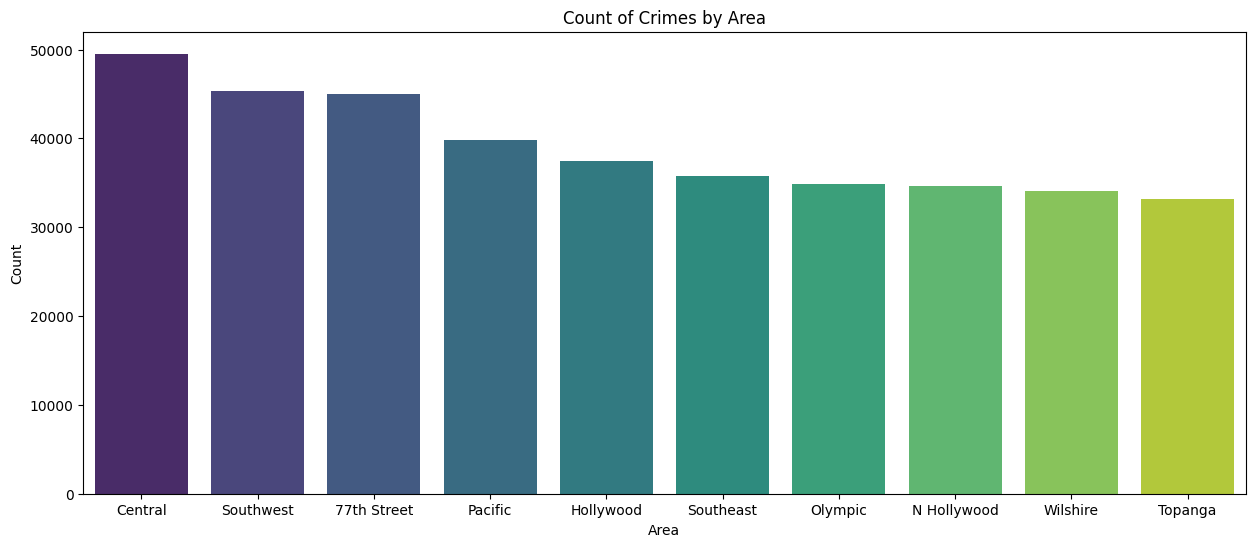

In [96]:
df_area = df_cleaned[['area_name']].value_counts().reset_index(name='count')
df_area = df_area.iloc[:10]

plt.figure(figsize=(15, 6))
sns.barplot(x='area_name', y='count', data=df_area, palette='viridis')
plt.xlabel('Area')
plt.ylabel('Count')

plt.title('Count of Crimes by Area')
plt.show()

Central is the area with the highest crime rate, followed by 77th Street, Pacific, and Southwest, respectively.

###7.What is the arrest rate?


Arrest Rate: 9.44%



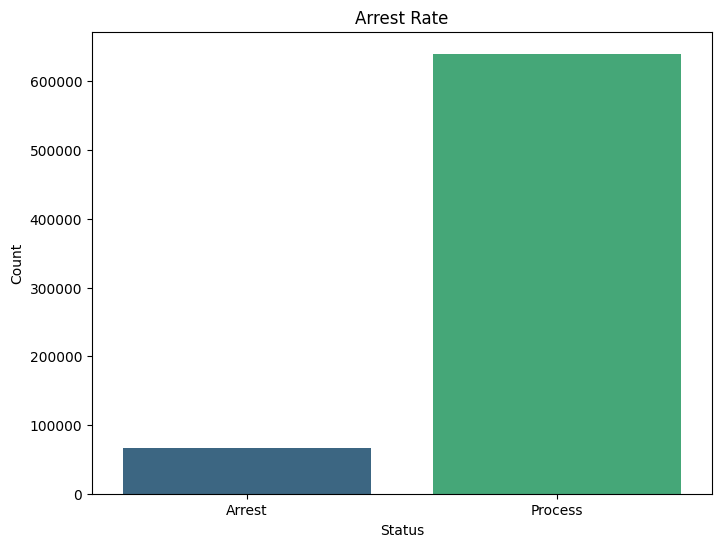

In [97]:
arrest_count = df_cleaned[df_cleaned['status_desc'].isin(['Juv Arrest', 'Adult Arrest'])].shape[0]
process_count = df_cleaned[df_cleaned['status_desc'].isin(['Invest Cont', 'Adult Other', 'Juv Other', 'UNK'])].shape[0]

df_arrest= pd.DataFrame({'Status': ['Arrest', 'Process'], 'Count': [arrest_count, process_count]})

arrest_rate = (arrest_count / (arrest_count + process_count)) * 100
print(f'Arrest Rate: {arrest_rate:.2f}%')
print()
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Count', data=df_arrest, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')

plt.title('Arrest Rate')
plt.show()

The arrest rate from all crime cases is **9.44%**, which is quite low.

Next, I will calculate the percentage of juvenile offenders from all the crime cases.

Arrest Rate: 0.55%



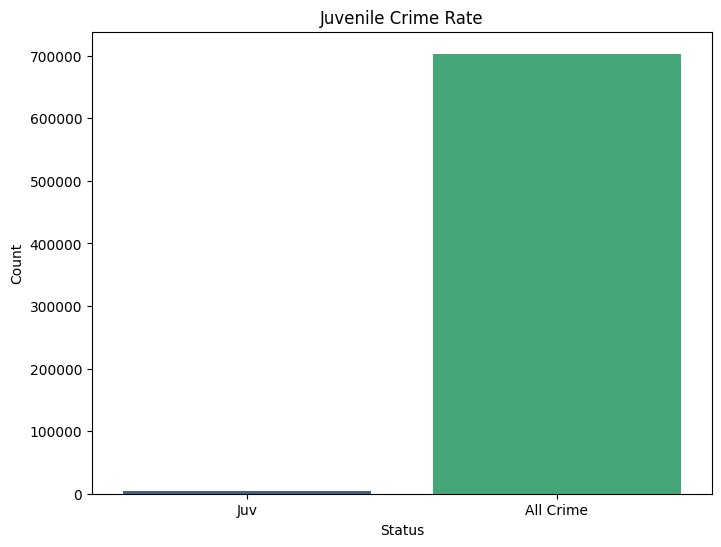

In [98]:
# Get the count of juvenile crimes
Juv_crime_count = df_cleaned[df_cleaned['status_desc'].isin(['Juv Arrest', 'Juv Other'])].shape[0]

# Get the count of all crimes excluding juvenile crimes
all_crime_count = df_cleaned[~df_cleaned['status_desc'].isin(['Juv Arrest', 'Juv Other'])].shape[0]

# Create a DataFrame for visualization
df_juv = pd.DataFrame({'Status': ['Juv', 'All Crime'], 'Count': [Juv_crime_count, all_crime_count]})

# Calculate juvenile crime rate
juv_rate = (Juv_crime_count / (Juv_crime_count + all_crime_count)) * 100
print(f'Arrest Rate: {juv_rate:.2f}%')
print()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Count', data=df_juv, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')

plt.title('Juvenile Crime Rate')
plt.show()


From the graph, it is evident that crimes committed by juveniles represent a very small percentage compared to the total number of crimes, accounting for just **0.55%**.

###8.What is the rate of weapon usage in all crime cases?

Weapon Usage Rate: 100.00%


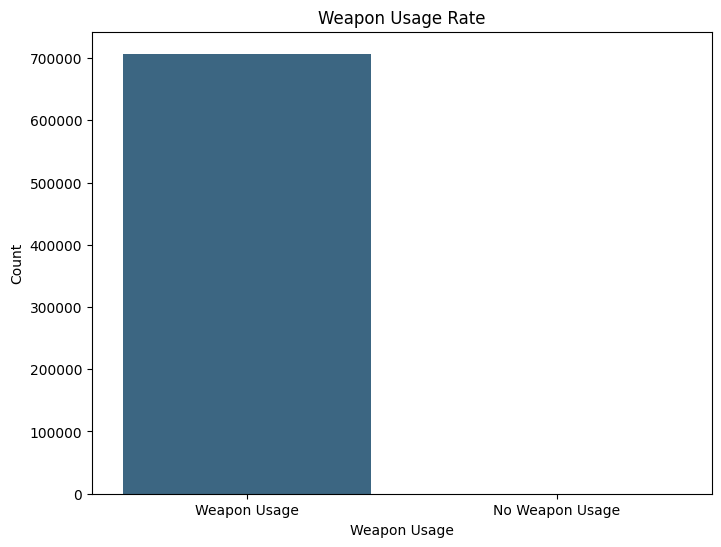

In [99]:
weapon_count = df_cleaned[df_cleaned['weapon_desc'] != 'NO WEAPON'].shape[0]
no_weapon_count = df_cleaned[df_cleaned['weapon_desc'] == 'NO WEAPON'].shape[0]
weapon_rate = weapon_count/df_cleaned.shape[0] * 100

print(f'Weapon Usage Rate: {weapon_rate:.2f}%')

df_weapon = pd.DataFrame({'weapon_usage': ['Weapon Usage','No Weapon Usage'], 'rate': [weapon_count,no_weapon_count]})
plt.figure(figsize=(8, 6))
sns.barplot(x='weapon_usage', y='rate',data= df_weapon, palette='viridis')
plt.xlabel('Weapon Usage')
plt.ylabel('Count')

plt.title('Weapon Usage Rate')
plt.show()

**42.14%**? I understand that this might be common in crimes, but it's a concerning figure because it increases the risk for both victims and law enforcement officers. Since nearly half of the criminals are armed, this emphasizes the difficulty and danger of handling such situations while trying to resolve them without causing harm to the victims, officers, or even the offenders.

###9.Which premises have the highest occurrence of crime?

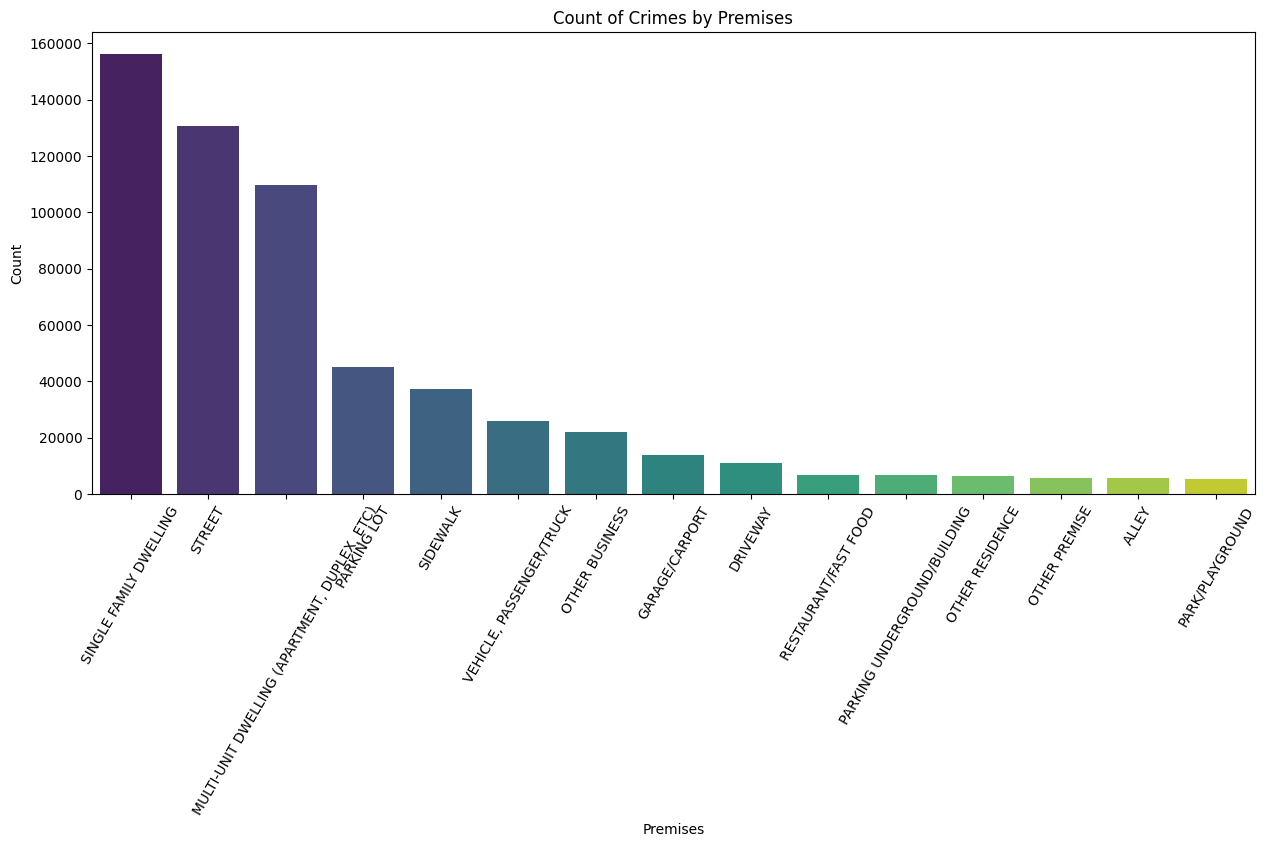

In [100]:
df_premis = df_cleaned[['premis_desc']].value_counts().reset_index(name='count')
df_premis = df_premis.iloc[:15]

plt.figure(figsize=(15, 6))
sns.barplot(x='premis_desc', y='count', data=df_premis, palette='viridis')
plt.xlabel('Premises')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Count of Crimes by Premises')
plt.show()

Based on the graph, it can be observed that most incidents occurred on **Single Family Dwelling**, which is twice as frequent as the second-highest location, **Street**.

In [101]:
df_cleaned['time_occ_hour'] = pd.to_datetime(df_cleaned['time_occ'], format='%H:%M:%S').dt.hour

In [102]:
df_cleaned['time_occ_hour'].head()

,time_occ_hour
0,18
1,17
2,20
3,12
4,23


<!-- I will prepare the data for the model using the following features:
1. Type of crime
2. Time of occurrence
3. Area
4. Location
5. Which coordinates

This will help security units develop strategies and allocate resources more efficiently for crime prevention and management. -->
ดดดด


I will create a new feature that assigns scores based on the frequency of occurrences. The values that appear more frequently will receive higher scores, while those that appear less frequently will receive lower scores.

In [103]:
# def create_frequency_score(df, column_name):
#     value_counts = df[column_name].value_counts().sort_values(ascending=True)
#     score_mapping = {value: score for score, value in enumerate(value_counts.index, 1)}
#     df[column_name + '_score'] = df[column_name].map(score_mapping)

# features_to_score = ['crm_cd_desc', 'time_occ', 'area_name', 'premis_desc']
# for feature in features_to_score:
#     create_frequency_score(df_cleaned, feature)

# df_cleaned[['crm_cd_desc', 'crm_cd_desc_score', 'time_occ_score', 'area_name_score', 'premis_desc_score']].head()

In [104]:
df_model = df_cleaned[['time_occ_hour','lat','lon']].copy()
df_model.head()

,time_occ_hour,lat,lon
0,18,34.0444,-118.2628
1,17,34.0210,-118.3002
2,20,34.1576,-118.4387
3,12,34.0944,-118.3277
4,23,33.9467,-118.2463


In [105]:
features = ['time_occ_hour','lat','lon']
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_model), columns=features)

df_normalized.head()

,time_occ_hour,lat,lon
0,0.782609,0.538670,0.790316
1,0.739130,0.501432,0.717298
2,0.869565,0.718810,0.446896
3,0.521739,0.618237,0.663608
4,1.000000,0.383195,0.822530


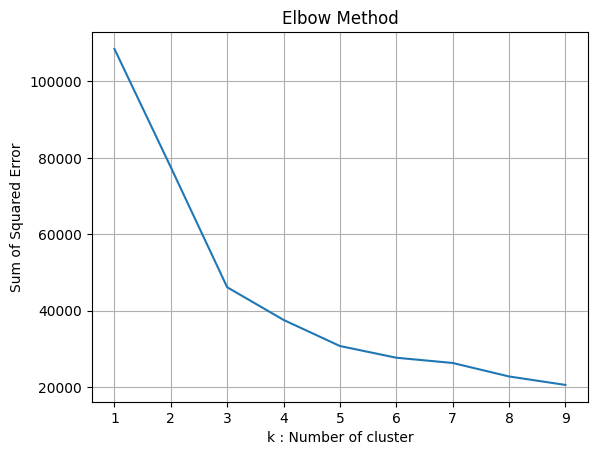

In [106]:
sse = {}
# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_normalized)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()
plt.show()

In [ ]:
# from sklearn.metrics import silhouette_score

# sil = []
# for k in range(2, 5):
#     kmeans = KMeans(n_clusters = k).fit(df_normalized)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(df_normalized, labels, metric = 'euclidean'))
# sns.lineplot(x = range(2,5), y = sil);
# plt.title('Silhouette Score Method')
# plt.xlabel("k : Number of cluster")
# plt.ylabel("Silhouette Score")
# plt.grid()

# plt.show()

จากelbow method ฉันเลือก  cluster ที่ 3

In [121]:
model = KMeans(n_clusters = 3,max_iter = 1000,random_state=42)
model.fit(df_normalized)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df_model['Class'] = labels
df_model.head()

,time_occ_hour,lat,lon,Class
0,18,34.0444,-118.2628,2
1,17,34.0210,-118.3002,2
2,20,34.1576,-118.4387,0
3,12,34.0944,-118.3277,2
4,23,33.9467,-118.2463,2


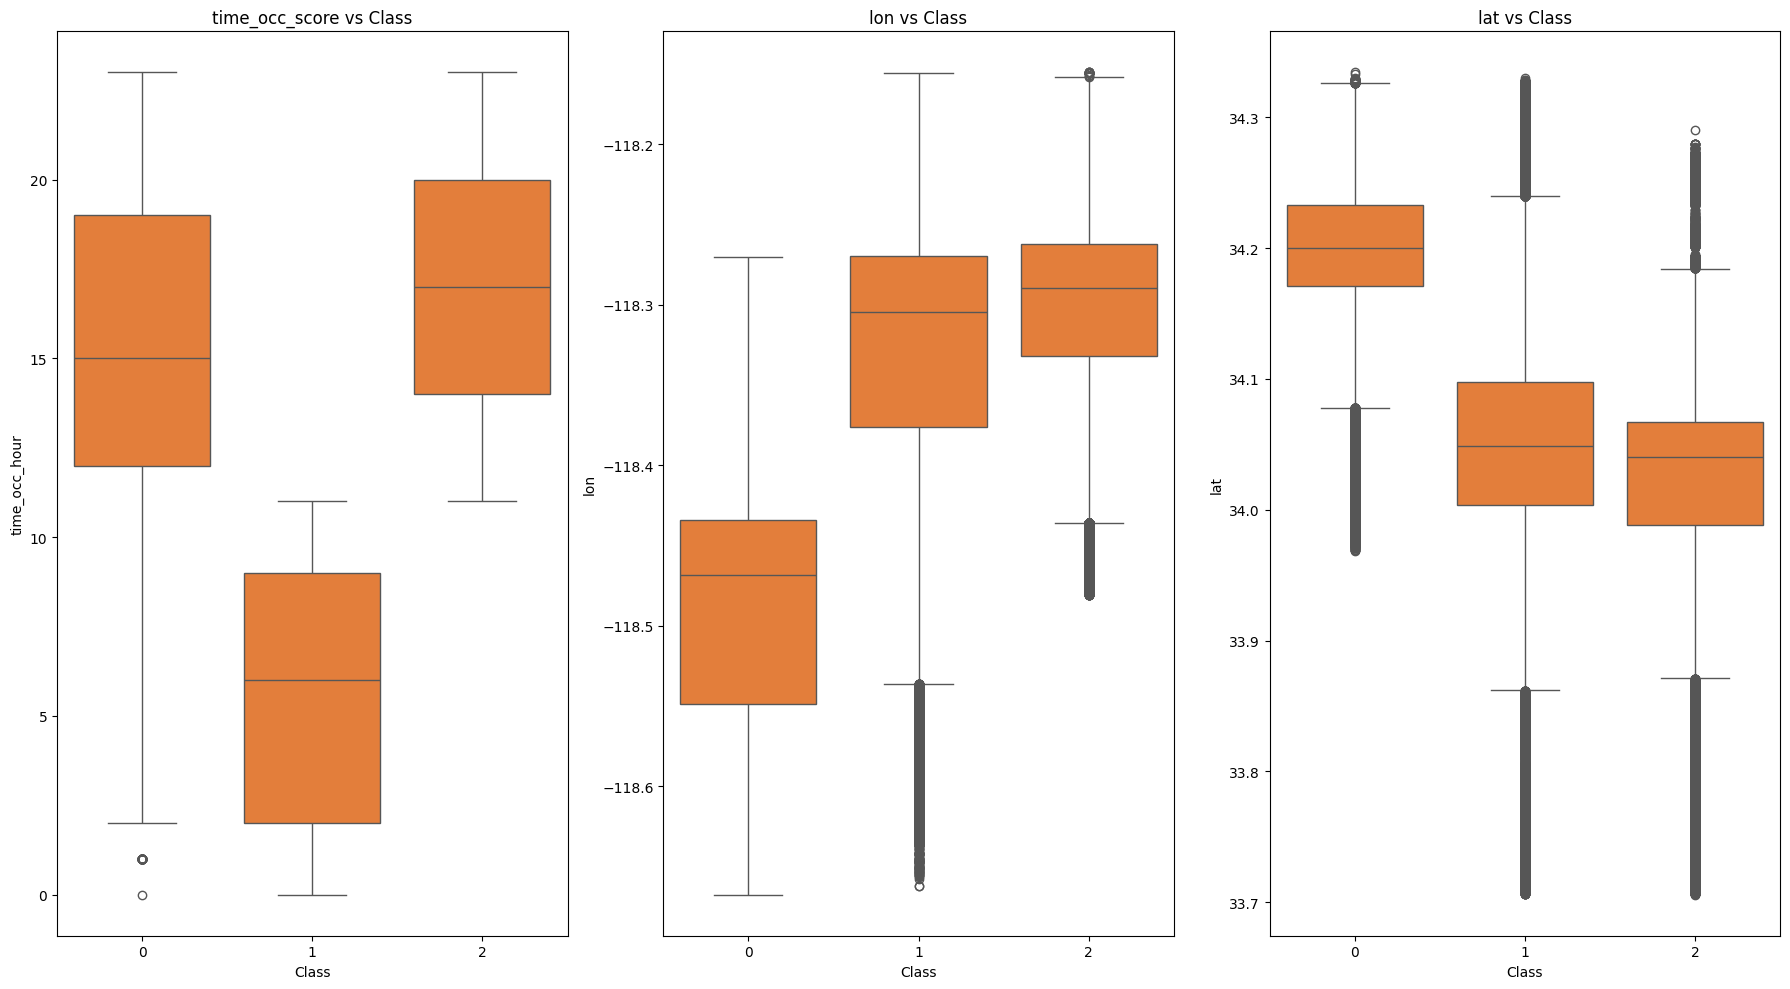

In [122]:
# สร้างกราฟที่มี 2 แถว 3 คอลัมน์
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

# Access the subplots using a single index
sns.boxplot(x='Class', y='time_occ_hour', data=df_model, color='#FF781F', ax=ax[0]) # Changed from ax[0, 1] to ax[0]
ax[0].set_title('time_occ_score vs Class')  # Changed from ax[0, 0] to ax[0]

sns.boxplot(x='Class', y='lon', data=df_model, color='#FF781F', ax=ax[1]) # Changed from ax[1, 0] to ax[1]
ax[1].set_title('lon vs Class')  # Changed from ax[0, 1] to ax[1]

sns.boxplot(x='Class', y='lat', data=df_model, color='#FF781F', ax=ax[2]) # Changed from ax[1, 2] to ax[2]
ax[2].set_title('lat vs Class')  # Changed from ax[0, 2] to ax[2]

plt.tight_layout()

plt.show()

จากการทำ classification โดยมี 3 cluster

In [124]:
df_model.groupby('Class')[['time_occ_hour','lat','lon']].agg(['mean','median','min','max'])

time_occ_hour                       lat                             \
               mean median min max       mean   median      min      max   
Class                                                                      
0         15.013160   15.0   0  23  34.195934  34.2002  33.9685  34.3343   
1          5.316133    6.0   0  11  34.052281  34.0486  33.7061  34.3297   
2         17.363046   17.0  11  23  34.020974  34.0402  33.7059  34.2903   

              lon                                
             mean    median       min       max  
Class                                            
0     -118.487978 -118.4686 -118.6676 -118.2702  
1     -118.328290 -118.3047 -118.6625 -118.1560  
2     -118.299995 -118.2894 -118.4812 -118.1554